In [42]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
%matplotlib inline

<h1>Purpose of the Project</h1>
<br>
The goal of this project is to analyze, through supervised learning, any kinds of relations between monthly average
urban Consumer Price Index, price of grocery items, and time in the United States. I will be using singular and multiple
linear regression through Ordinary Least Squares to predict causal relationships between individual grocery items, the
monthly CPI, and the months and years that each of these attributes are being evaluated. 

I will be using data from the Federal Reserve Economic Data (FRED) Site from the St. Louis Federal Reserve Branch, which 
has more than 100 years of financial data on the average monthly price of bread, milk, etc. The goal of the project is to 
evaluate what effects that raising the prices of grocery items have become in response to raising the urban Consumer Price 
Index (CPI) on urban areas in the United States. The data collected and cleaned is based on a rolling monthly average. 



<h2>About the Data</h2>
<br>
The datasets are compilations of grocery items' monthly average prices in urban areas of the United States. 

There were some empty data points with each of the CSV files that I was working with, but they have been edited to make 
sure that any empty values were filled or removed accordingly. There were six CSV files combined into one CSV file 
containing all of the columns of average grocery items' prices. The dates were also reformatted in the CSV files using
Microsoft Excel where the dates, initially listed in its respective column in the form <b>M/D/YYYY</b> are now listed in 
the form <b>YYYY-MM-DD</b>.

There are seven columns, one of which is a date consisting of a month and year. 
By default, the day of the month had already been preset by FRED to the first day of each month for 300 months, or 25 
years, from February 1999 to February 2024, which was the last month of recorded data on monthly average urban prices. 

The grocery items being compared and run through for modeling are: 
white bread, ground beef, eggs, whole milk, and bananas. 
Another column, urban_cpi, is the average urban Consumer Price Index (CPI) for spending on groceries in urban US areas. 



<h2>Data Preparation</h2>
<br>
All data editing and preparation was done prior to evaluating and/or modeling on any of its contents using Microsoft Excel.
For each of the grocery items being evaluated and inputted for modeling, collections of monthly average prices began as 
early as 1985 for items. The monthly average urban CPI had data collected since January 1913. 

Since the analysis and modeling are for patterns and trends in the last 25 years, original files were modified and redacted
to only present data for all six attributes listed above from February 1999 to February 2024. 


<h2>Supervised Learning Models Used</h2>
<br>

In this analysis, I will use linear regression modeling with Ordinary Least-Squares (OLS) Regression. 
This will be done by using the ````statsmodels```` library in Python with ```ols```. 


In [43]:
# Call the CSV file and read it. Then return its basic structural info. 
groceries_df = pd.read_csv("fred_groceries_021999_022024.csv", encoding='utf-8')
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         301 non-null    object 
 1   white_bread  301 non-null    float64
 2   ground_beef  301 non-null    float64
 3   egg          301 non-null    float64
 4   whole_milk   301 non-null    float64
 5   banana       301 non-null    float64
 6   urban_cpi    301 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [44]:
# groceries_df.urban_cpi

In [45]:
# Add a column for signifying the number of each month (300 in total)
month= np.arange(0, len(groceries_df.DATE), 1, dtype=int)
# month
groceries_df['month_number'] = month
groceries_df['month_number'].head()

0    0
1    1
2    2
3    3
4    4
Name: month_number, dtype: int32

In [46]:
# To refresh, these are the descriptive statistics of the table
groceries_df.describe()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi,month_number
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.297900,2.999774,1.651575,3.289449,0.561970,227.267920,150.000000
std,0.258624,1.078457,0.579640,0.392196,0.049593,42.223027,87.035433
min,0.878000,0.000000,0.838000,2.656000,0.469000,163.300000,0.000000
25%,1.046000,2.196000,1.257000,2.964000,0.509000,190.400000,75.000000
50%,1.358000,2.818000,1.599000,3.241000,0.574000,229.554000,150.000000
75%,1.419000,3.841000,1.920000,3.557000,0.601000,251.238000,225.000000
max,2.033000,5.353000,4.823000,4.218000,0.643000,327.731000,300.000000


In [47]:
# Perform single linear regresssion on each of the columns 
# with respect to Average Urban Consumer Price Index in US
# Create X, y variables

X = sm.add_constant(groceries_df)
y = groceries_df['urban_cpi']

# Create train and test data splits, 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
# Get shapes of X, y
print(X.shape, y.shape)

(301, 9) (301,)


In [49]:
# Get shapes of X_train, X_test, y_train, y_test

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 9) (61, 9) (240,) (61,)


In [50]:
# Get the linear regression model summary 
# using Ordinary Linear Squares (OLS) from statsmodels

lr_model = smf.ols(formula="urban_cpi ~ white_bread", data=X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1705.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.69e-110
Time:                        10:36:45   Log-Likelihood:                -991.25
No. Observations:                 240   AIC:                             1986.
Df Residuals:                     238   BIC:                             1993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.1750      4.895      5.961      0.000      19.533      38.817
white_bread   152.2903      3.688     41.290      0.000     145.024     159.556
==============================================================================
Omnibus:                        8.429   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.079
Skew:                           0.400   Prob(JB):                       0.0176
Kurtosis:                       2.590   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Predict the values of CPI on white bread price 
# then compare to the actual CPI values

lr_preds = lr_model.predict(X_test)
lr_preds

223    234.614584
150    253.650872
226    229.589004
296    334.060152
52     175.525946
          ...    
137    236.289777
227    224.258843
26     182.683590
106    224.106553
92     196.237427
Length: 61, dtype: float64

In [52]:
lr_model.fittedvalues

74     182.074429
239    223.192811
64     178.267172
294    329.186863
286    314.414703
          ...    
251    234.919165
192    247.711550
117    238.878713
47     187.861461
172    248.320711
Length: 240, dtype: float64

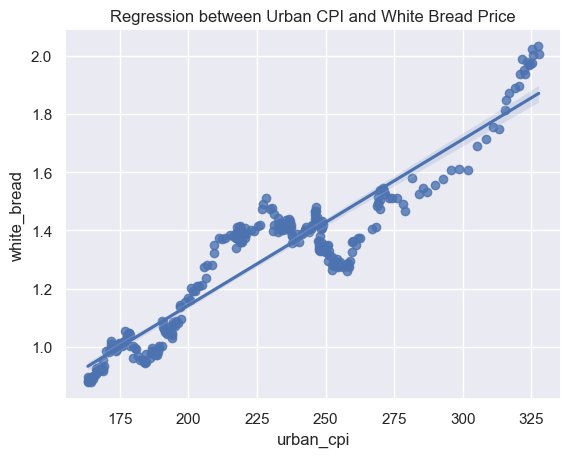

In [53]:
# Regression plot between urban CPI and white bread price

sns.regplot(x='urban_cpi', y='white_bread', data=groceries_df)
plt.title("Regression between Urban CPI and White Bread Price")
plt.show()

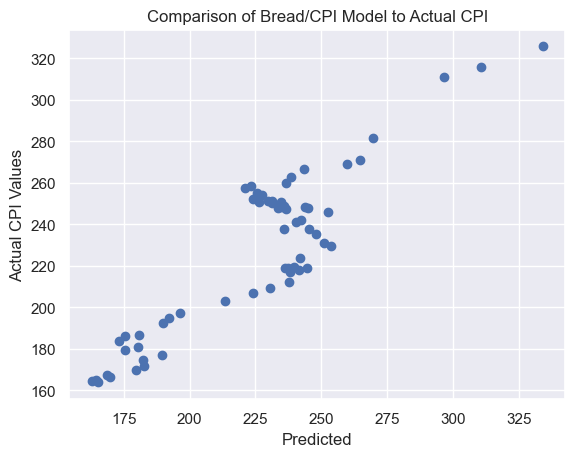

In [56]:
# Make a scatter plot of the predicted CPI values (x) compared to the actual listed CPI values (y)

plt.scatter(lr_preds, y_test)
plt.title("Comparison of Bread/CPI Model to Actual CPI")
plt.xlabel("Predicted")
plt.ylabel("Actual CPI Values")
plt.show()

In [14]:
# Single linear regression (OLS) between urban CPI and price of ground beef on X_train

lr_model_beef = smf.ols(formula="urban_cpi ~ ground_beef", data=X_train).fit()
lr_model_beef.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2038.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.11e-118
Time:                        10:34:49   Log-Likelihood:                -972.26
No. Observations:                 240   AIC:                             1949.
Df Residuals:                     238   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.0974      2.621     44.289      0.000     110.933     121.261
ground_beef    37.0788      0.821     45.144      0.000      35.461      38.697
==============================================================================
Omnibus:                      182.554   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.403
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      23.621   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lr_preds_beef = lr_model_beef.predict(X_test)
lr_preds_beef

223    253.548465
150    220.622491
226    253.585544
296    309.871161
52     187.733596
          ...    
137    207.051651
227    251.101264
26     181.467279
106    198.931394
92     197.893187
Length: 61, dtype: float64

In [16]:
lr_model_beef.fittedvalues

74     201.712304
239    257.033872
64     193.147101
294    304.309341
286    294.075593
          ...    
251    260.185570
192    273.237308
117    203.492086
47     179.947048
172    241.497855
Length: 240, dtype: float64

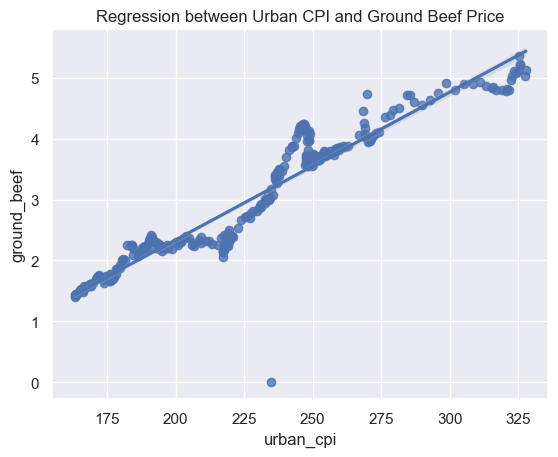

In [17]:
sns.regplot(x='urban_cpi', y='ground_beef', data=groceries_df)
plt.title("Regression between Urban CPI and Ground Beef Price")
plt.show()

In [18]:
lr_model_egg = smf.ols(formula="urban_cpi ~ egg", data=X_train).fit()
lr_model_egg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     291.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.08e-43
Time:                        10:34:49   Log-Likelihood:                -1147.2
No. Observations:                 240   AIC:                             2298.
Df Residuals:                     238   BIC:                             2305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.4136      5.525     25.053      0.000     127.530     149.297
egg           53.4937      3.132     17.081      0.000      47.324      59.663
==============================================================================
Omnibus:                       19.382   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.551
Skew:                           0.748   Prob(JB):                     1.27e-05
Kurtosis:                       2.869   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lr_preds_egg = lr_model_egg.predict(X_test)
lr_preds_egg

223    214.481638
150    229.941320
226    235.504666
296    249.252550
52     202.552540
          ...    
137    215.498018
227    233.043955
26     193.405116
106    250.696880
92     205.655175
Length: 61, dtype: float64

In [20]:
lr_model_egg.fittedvalues

74     200.680260
239    221.542808
64     208.543836
294    247.701232
286    365.761852
          ...    
251    216.567892
192    250.108449
117    236.735021
47     201.268691
172    237.858389
Length: 240, dtype: float64

In [21]:
lr_preds_egg.axes

[Index([223, 150, 226, 296,  52, 261, 246, 166, 221, 215, 225, 133, 214,  12,
         15,  66, 285,  89, 176, 101,  22, 205, 224, 212, 190, 129, 175, 136,
        152,  55, 201, 253, 144,   8, 271, 111, 263,  81, 184, 282,   5,  59,
        234, 241,  34, 250, 182, 122, 254,   7,  45, 216, 238,  63, 108, 118,
        137, 227,  26, 106,  92],
       dtype='int64')]

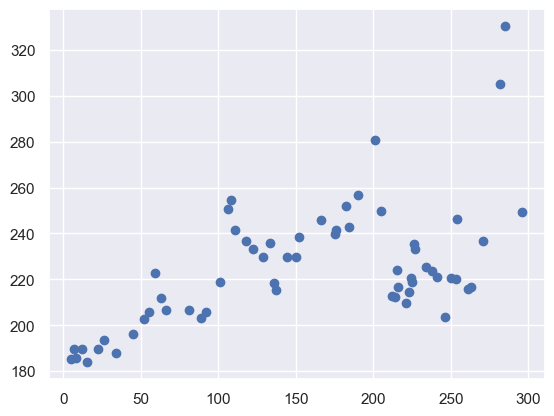

In [22]:
plt.scatter(lr_preds_egg.axes, lr_preds_egg)
# plt.title("Regression between Urban CPI and Eggs")
plt.show()

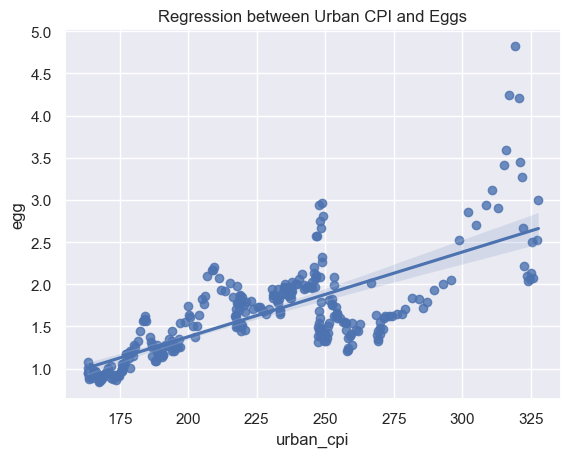

In [23]:
sns.regplot(x='urban_cpi', y='egg', data=groceries_df)
plt.title("Regression between Urban CPI and Eggs")
plt.show()

In [24]:
lr_model_milk = smf.ols(formula="urban_cpi ~ whole_milk", data=X_train).fit()
lr_model_milk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     262.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.00e-40
Time:                        10:34:50   Log-Likelihood:                -1154.1
No. Observations:                 240   AIC:                             2312.
Df Residuals:                     238   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.8142     16.054     -1.919      0.056     -62.441       0.813
whole_milk    78.3447      4.839     16.189      0.000      68.811      87.878
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.461
Skew:                           0.172   Prob(JB):                        0.177
Kurtosis:                       2.523   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lr_preds_milk = lr_model_milk.predict(X_test)
lr_preds_milk

223    220.593818
150    260.079533
226    216.363206
296    276.845293
52     178.836108
          ...    
137    228.741664
227    201.164339
26     192.076357
106    272.379647
92     209.233841
Length: 61, dtype: float64

In [26]:
lr_model_milk.fittedvalues

74     221.847333
239    197.403795
64     249.189624
294    276.845293
286    299.095180
          ...    
251    224.040984
192    243.078739
117    261.724771
47     179.619554
172    240.101642
Length: 240, dtype: float64

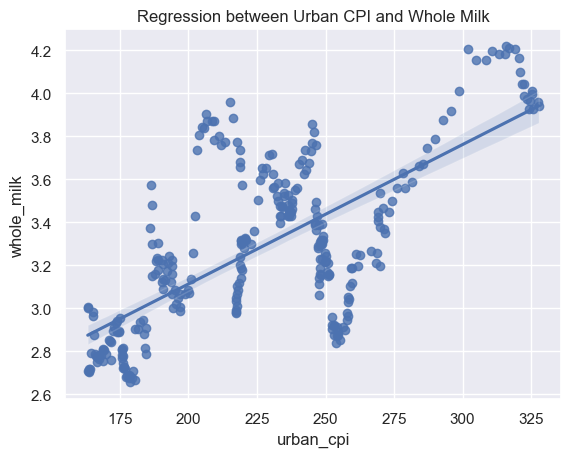

In [27]:
sns.regplot(x='urban_cpi', y='whole_milk', data=groceries_df)
plt.title("Regression between Urban CPI and Whole Milk")
plt.show()

In [28]:
# Single LR model between Urban CPI and Banana price
lr_model_banana = smf.ols(formula="urban_cpi ~ banana", data=X_train).fit()
lr_model_banana.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     437.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.36e-56
Time:                        10:34:51   Log-Likelihood:                -1118.0
No. Observations:                 240   AIC:                             2240.
Df Residuals:                     238   BIC:                             2247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -158.8139     18.523     -8.574      0.000    -195.303    -122.325
banana       686.1932     32.793     20.925      0.000     621.591     750.795
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.202
Skew:                          -0.130   Prob(JB):                        0.548
Kurtosis:                       2.771   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lr_preds_banana = lr_model_banana.predict(X_test)
lr_preds_banana

223    214.475165
150    257.019143
226    224.081870
296    270.743006
52     198.692722
          ...    
137    241.236699
227    230.943801
26     178.793119
106    201.437494
92     176.734539
Length: 61, dtype: float64

In [30]:
lr_model_banana.fittedvalues

74     186.341244
239    236.433347
64     182.910278
294    274.173972
286    272.115393
          ...    
251    232.316188
192    246.726245
117    270.743006
47     202.123687
172    254.960563
Length: 240, dtype: float64

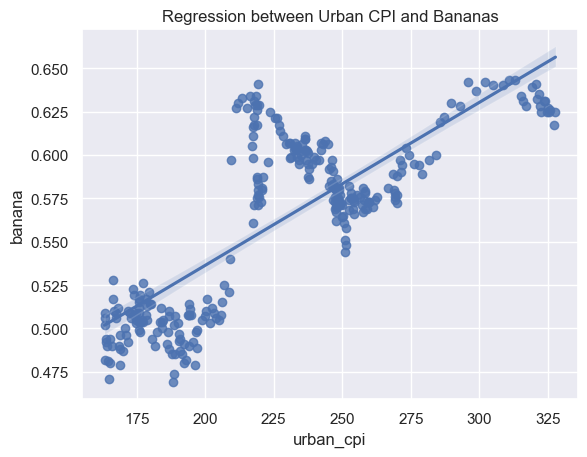

In [31]:
sns.regplot(x='urban_cpi', y='banana', data=groceries_df)
plt.title("Regression between Urban CPI and Bananas")
plt.show()

<h3>Multiple Linear Regression</h3>

To do multiple linear regression on more than one attribute of ```groceries_df```, I will pick out specific columns of 
what is being listed as the independent variable and which columns are considered dependent variables. 

I will continue to use ```smf.ols``` to fit the data and predict. 

The columns that are to be used under X: month_number, white_bread, whole_milk, egg
The column(s) under y: urban_cpi

Implement a multilinear regression model on four of the five items and fit the data to the ```X_train``` dataset. 

In [32]:
# Four grocery items compared: white bread, whole milk, egg, ground beef to be fit
lr_model_multi_four = smf.ols('urban_cpi ~ white_bread \
                              + whole_milk + egg + \
                              ground_beef', data=X_train).fit()
lr_model_multi_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1693.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.51e-172
Time:                        10:34:52   Log-Likelihood:                -835.81
No. Observations:                 240   AIC:                             1682.
Df Residuals:                     235   BIC:                             1699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.8511      5.213     13.399      0.000      59.580      80.122
white_bread    87.6140      4.814     18.199      0.000      78.130      97.098
whole_milk     -5.4505      2.341     -2.328      0.021     -10.063      -0.838
egg            -1.1216      1.517     -0.739      0.460      -4.111       1.867
ground_beef    21.1033      0.861     24.515      0.000      19.407      22.799
==============================================================================
Omnibus:                      137.270   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2311.190
Skew:                           1.841   Prob(JB):                         0.00
Kurtosis:                      17.750   Cond. No.                         56.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Predict the CPI values (four items)
lr_four = lr_model_multi_four.predict(X_train)
lr_four

74     187.659707
239    244.064792
64     178.527382
294    325.875595
286    307.529190
          ...    
251    250.855988
192    263.616216
117    217.822411
47     181.526868
172    246.366184
Length: 240, dtype: float64

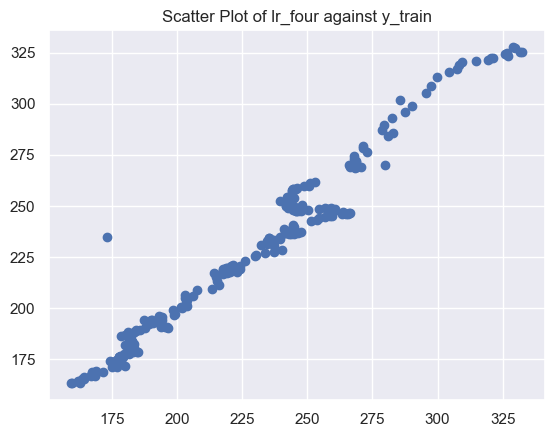

In [62]:
# Scatter plot of predicted results against actual CPI values

plt.scatter(lr_four, y_train)
plt.title("Scatter Plot of lr_four against y_train")
plt.show()

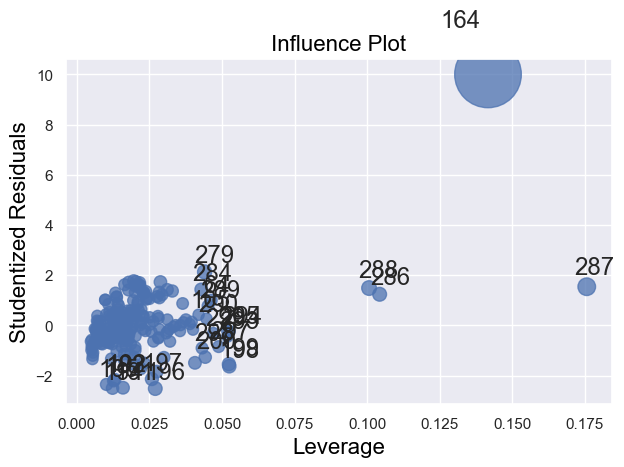

In [36]:
# Influence plot on the four items

fig = sm.graphics.influence_plot(lr_model_multi_four)
fig.tight_layout(pad=1.0)
plt.show()

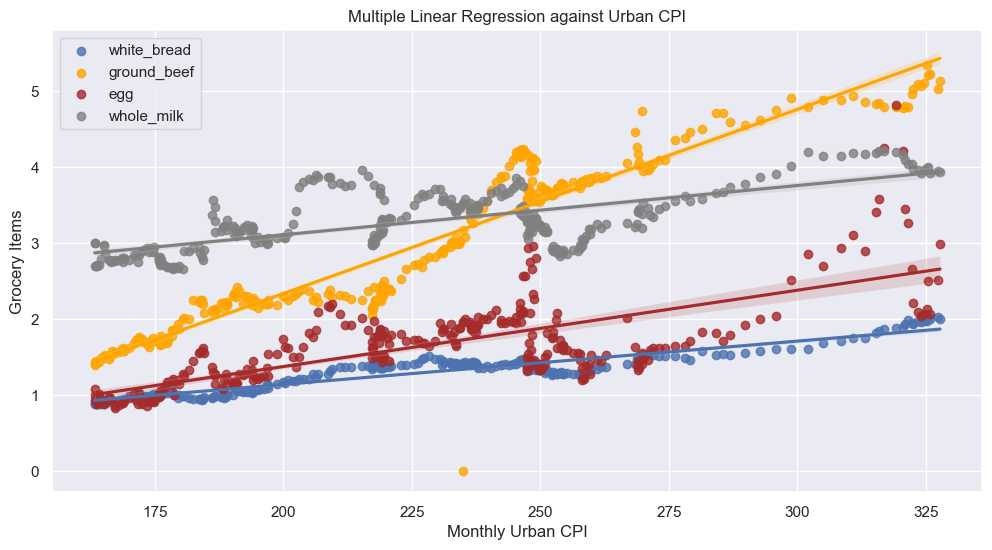

In [63]:
# Four Grocery Items' Regression Plots

plt.figure(figsize=(12,6))
sns.regplot(x='urban_cpi', y='white_bread', data=groceries_df, label='white_bread')
sns.regplot(x='urban_cpi', y='ground_beef', data=groceries_df, label='ground_beef', color='orange')
sns.regplot(x='urban_cpi', y='egg', data=groceries_df, label='egg', color='brown')
sns.regplot(x='urban_cpi', y='whole_milk', data=groceries_df, label='whole_milk', color='grey')

plt.title("Multiple Linear Regression against Urban CPI")
plt.xlabel("Monthly Urban CPI")
plt.ylabel("Grocery Items")
plt.legend()
plt.show()

In [64]:
# All five grocery items compared: white bread, whole milk, egg, ground beef, banana

lr_model_multi_five = smf.ols('urban_cpi ~ white_bread \
                              + whole_milk + egg + \
                              ground_beef', data=X_train).fit()
lr_model_multi_five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1693.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.51e-172
Time:                        10:52:05   Log-Likelihood:                -835.81
No. Observations:                 240   AIC:                             1682.
Df Residuals:                     235   BIC:                             1699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.8511      5.213     13.399      0.000      59.580      80.122
white_bread    87.6140      4.814     18.199      0.000      78.130      97.098
whole_milk     -5.4505      2.341     -2.328      0.021     -10.063      -0.838
egg            -1.1216      1.517     -0.739      0.460      -4.111       1.867
ground_beef    21.1033      0.861     24.515      0.000      19.407      22.799
==============================================================================
Omnibus:                      137.270   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2311.190
Skew:                           1.841   Prob(JB):                         0.00
Kurtosis:                      17.750   Cond. No.                         56.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Predict the CPI values (four items)

lr_five = lr_model_multi_five.predict(X_train)
lr_five

74     187.659707
239    244.064792
64     178.527382
294    325.875595
286    307.529190
          ...    
251    250.855988
192    263.616216
117    217.822411
47     181.526868
172    246.366184
Length: 240, dtype: float64

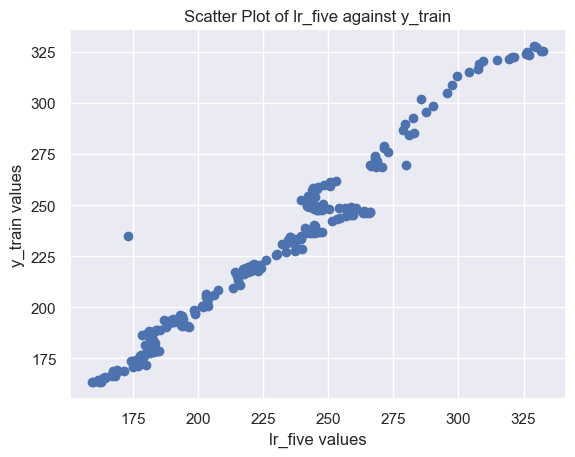

In [65]:
# Scatter plot of predicted results on the five items against actual CPI values

plt.scatter(lr_five, y_train)
plt.title("Scatter Plot of lr_five against y_train")
plt.xlabel("lr_five values")
plt.ylabel("y_train values")
plt.show()

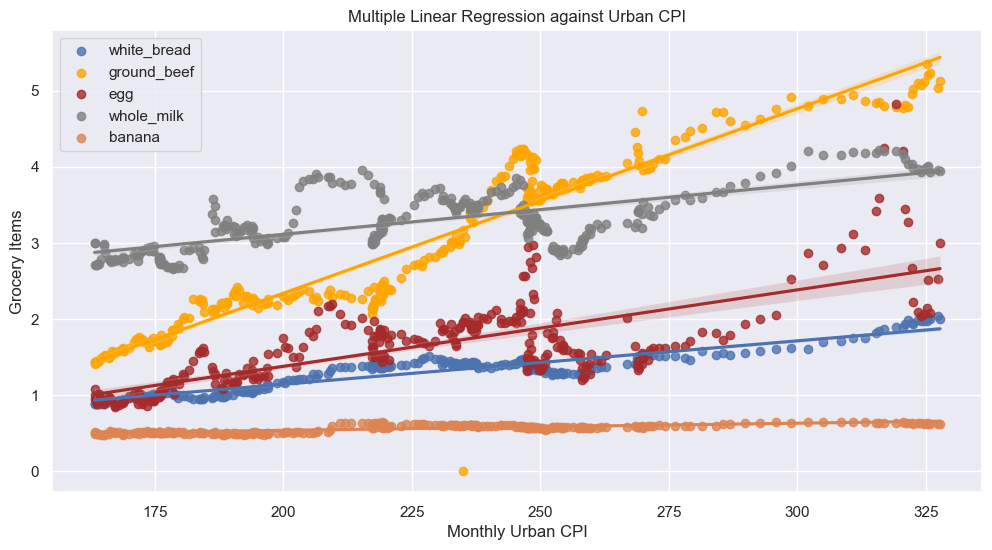

In [59]:
# Five Grocery Items' Regression Plots

plt.figure(figsize=(12,6))
sns.regplot(x='urban_cpi', y='white_bread', data=groceries_df, label='white_bread')
sns.regplot(x='urban_cpi', y='ground_beef', data=groceries_df, label='ground_beef', color='orange')
sns.regplot(x='urban_cpi', y='egg', data=groceries_df, label='egg', color='brown')
sns.regplot(x='urban_cpi', y='whole_milk', data=groceries_df, label='whole_milk', color='grey')
sns.regplot(x='urban_cpi', y='banana', data=groceries_df, label='banana')

plt.title("Multiple Linear Regression against Urban CPI")
plt.xlabel("Monthly Urban CPI")
plt.ylabel("Grocery Items")
plt.legend()
plt.show()

We can see that based on the R-squared value that there is a positive relationship between the Urban CPI and any 
combination of four of the five grocery items. In this case, I compared the Urban CPI to the sum of the coefficients of white bread, whole milk, eggs, and ground beef. 



In [37]:
# Just using two grocery items for comparison: whole milk and egg

lr_model_multi_two = smf.ols('urban_cpi ~ whole_milk + egg', data=X_train).fit()
lr_model_multi_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     185.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.70e-49
Time:                        10:34:55   Log-Likelihood:                -1130.3
No. Observations:                 240   AIC:                             2267.
Df Residuals:                     237   BIC:                             2277.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5488     17.454      2.209      0.028       4.164      72.933
whole_milk    40.7878      6.810      5.989      0.000      27.372      54.204
egg           32.7281      4.536      7.215      0.000      23.792      41.664
==============================================================================
Omnibus:                       15.872   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.616
Skew:                           0.574   Prob(JB):                     0.000406
Kurtosis:                       2.505   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lr_two = lr_model_multi_two.predict(X_train)
lr_two

74     208.185030
239    208.223163
64     227.231012
294    265.586057
286    349.400619
          ...    
251    219.047322
192    249.479258
117    251.004752
47     186.560390
172    240.434595
Length: 240, dtype: float64

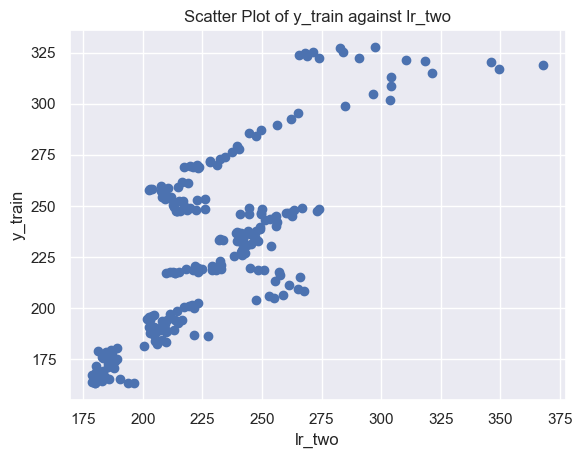

In [67]:
# Note how the scatter plot for two items is different from those of four and five items
# The regression line would be off

plt.scatter(lr_two, y_train)
plt.title("Scatter Plot of y_train against lr_two")
plt.xlabel("lr_two")
plt.ylabel("y_train")
plt.show()

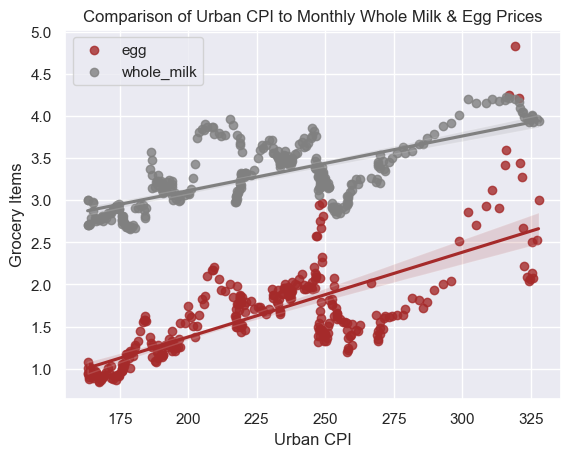

In [68]:
# Regression plots of egg and whole milk
sns.regplot(x='urban_cpi', y='egg', data=groceries_df, label='egg', color='brown')
sns.regplot(x='urban_cpi', y='whole_milk', data=groceries_df, label='whole_milk', color='grey')
plt.ylabel("Grocery Items")
plt.xlabel("Urban CPI")
plt.title("Comparison of Urban CPI to Monthly Whole Milk & Egg Prices")
plt.legend()
plt.show()

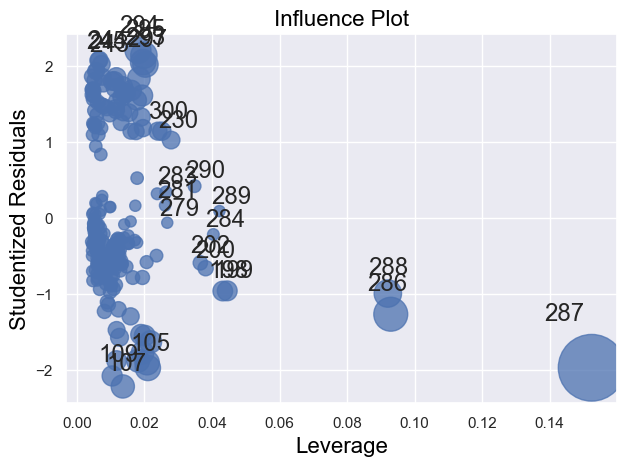

In [41]:
fig = sm.graphics.influence_plot(lr_model_multi_two)
fig.tight_layout(pad=1.0)
plt.show()

<h1>Conclusion</h1>
<br>
We can see that all of the five grocery items picked for this evaluation have had their average prices increased over the 
25-year period. Each of the five individual grocery items, when compared to the monthly urban CPI, had some form of 
correlation to the urban CPI. Of the five, however, the item which had data points that were closest to the regression 
coefficients was ground beef, where the monthly average price by the pound was nearly steady with the rise in the CPI. 

The comparison of two different kinds of linear regression models from two different Python libraries, with two different 
methods of conducting this form of supervised learning. The statsmodels version provided immediate fitting and prediction 
value sets that could easily be presented visually, and provides entire arrays worth of predicted values with respect to 
the urban CPI. 

It can be seen that the fewer items are involved in prediction models, the less likely that one item will have a strong 
connection with the CPI. If all five items are included, the connection is higher. Both single and multiple linear 
regression show that this will be the case with the prices of items gradually rising despite periods of faster price hikes. 

These five grocery items alone only portray just a small picture of how it can be affected by the overall urban CPI, and 
the CPI itself. The overall cost of groceries have gone up over time, independent of other external factors (public health 
crises, climate change, rapid economic change, etc.). Even looking at just the average monthly prices at face value, 
without the analysis, prices have been and will continue to go up. Supply and demand might be one of the key causes of the 
increase in costs and spending, but how tightly related produce, meats, or grains, among other agricultural fields, are to 
CPI here in the US and around the world, will depend on other factors in how consumers purchase what food they need. 

The price of items as well as the CPI in the US will rise gradually and not accelerate as initially thought. Despite 
challenges with being able to explicitly outline the constant rise, there will be no faster growth. When prices of grocery 
items drop or remain the same on a monthly basis, the mean price growth will slow down and the slope be closer to zero. 
Barring external factors and the types of items, growth of the CPI will likely continue to increase while the rate of 
the prices of items purchased will increase at slower, consistent rates over time. 



<h1>References</h1>
<br>
FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Average Price: Bananas (Cost per Pound/453.6Grams) in U.S. City Average [APU0000711211]</i>. [Unpublished raw data]. Retrieved April 3, 2024, from https://fred.stlouisfed.org/series/APU0000711211.

FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Average Price: Bread, White, Pan (Cost perPound/453.6 Grams) in U.S. City Average [APU0000702111]</i>. [Unpublished raw data]. Retrieved April 2, 2024, from https://fred.stlouisfed.org/series/APU0000702111.

FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Average Price: Eggs, Grade A, Large (Cost per Dozen)in U.S. City Average [APU0000708111]</i>. [Unpublished raw data]. Retrieved March 27, 2024, from https://fred.stlouisfed.org/series/APU0000708111.

FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Average Price: Ground Beef, 100% Beef (Cost perPound/453.6 Grams) in U.S. City Average [APU0000703112]</i>. [Unpublished raw data]. Retrieved April 8, 2024, from https://fred.stlouisfed.org/series/APU0000703112.

FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Consumer Price Index for All Urban Consumers: Foodin U.S. City Average [CPIUFDNS]</i>. [Unpublished raw data]. Retrieved March 31, 2024, from https://fred.stlouisfed.org/series/CPIUFDNS.

FRED, Federal Reserve Bank of St. Louis. (n.d.). <i>Producer Price Index by Commodity: Processed Foods and Feeds: Fluid Whole Milk [WPU02310301]</i>. [Unpublished raw data]. Retrieved April 28, 2024, from https://fred.stlouisfed.org/series/WPU02310301.

